# 술에 취한 딱정벌레

딱정벌레가 N X N 크기의 방을 움직이고 있다.

가운데 점을 시작 위치로, 딱정벌레가 술에 취해 상하좌우 4방향을 무작위로 움직인다.

딱정벌레가 방안의 모든 타일을 한 번 이상 지나가는데 걸리는 총 이동수는 얼마인가?

In [54]:
import numpy as np
x=2
N=2*x+1
room = np.zeros(shape=(N,N),dtype=np.int64)

### 심화) 딱장벌레가 모든 타일을 지나갔을 때, 각각의 타일을 몇 번 지나갔는지 숫자로 표시하세요.

In [10]:
room[x,x]=1

In [12]:
i = x
j = x

In [24]:
movelist = ['w','s','a','d']

In [ ]:
import random
import numpy as np
import time
from IPython.display import clear_output
x=2
N=2*x+1
room = np.zeros(shape=(N,N),dtype=np.int64)
movelist = ['w','s','a','d']
i = x
j = x

def randommove(ㅋ, ㅌ):
    move = random.choice(movelist)
    p = ㅋ
    q = ㅌ
    if move =='w':
        ㅌ-=1
    elif move == 's':
        ㅌ+=1
    elif move == 'a':
        ㅋ-=1
    else:
        ㅋ+=1

    if (ㅌ>=N) | (ㅋ>=N) |(ㅌ<0)|(ㅋ<0):
        ㅋ,ㅌ = randommove(p,q)
        return ㅋ,ㅌ
    else:
        return ㅋ, ㅌ
m=0
n=0
while True:
    room = np.zeros(shape=(N,N),dtype=np.int64)
    while (np.where(room==0)[0].shape!=(0,)):
        # clear_output()
        m+=1
        room[j,i]+=1
        # print(room)
        # print(i, j)
        # time.sleep(1/144)
        i, j=randommove(i,j)
    if m >50:
        m=0
    elif m <=50:
        break
    n+=1
print(room)
print(i, j)
print(m,'회')
print(n,'루프')

In [ ]:
m

In [ ]:
room

In [ ]:
np.where(room==0)

In [ ]:
t=0
d=4
t,d=randommove(t,d)

In [ ]:
print(randommove(0,4))

In [38]:
room=room+1

In [ ]:
room[j+1,i+1]=2
np.where(room==0)[0].shape==(0,)

In [ ]:
import os
import numpy as np
import cv2
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# 데이터셋 경로 설정
DATASET_PATH = 'Google_Recaptcha_V2_Images_Dataset/images/'  # 예: 'dataset/'

# 클래스 이름 추출 (폴더 이름)
class_names = sorted(os.listdir(DATASET_PATH))
num_classes = len(class_names)
print(f"클래스 수: {num_classes}")
print(f"클래스 이름: {class_names}")

# 이미지와 레이블 저장할 리스트 초기화
images = []
labels = []


# 데이터 로드 함수
def load_dataset(dataset_path, class_names, img_height, img_width):
    images = []
    labels = []
    for label, class_name in enumerate(class_names):
        class_dir = os.path.join(dataset_path, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            # 이미지 읽기
            img = cv2.imread(img_path)
            if img is None:
                continue  # 이미지 로드 실패 시 건너뛰기
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # BGR에서 RGB로 변환
            img = cv2.resize(img, (img_width, img_height))
            images.append(img)
            labels.append(label)
    return np.array(images), np.array(labels)

# 데이터 로드
images, labels = load_dataset(DATASET_PATH, class_names, IMG_HEIGHT, IMG_WIDTH)
print(f"총 이미지 수: {len(images)}")


In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from IPython.display import clear_output
# 이미지 파일 경로 (이미지 파일들이 들어있는 폴더 경로)
DATASET_PATH = 'Google_Recaptcha_V2_Images_Dataset/images/'  # 예: 'dataset/'
class_names = sorted(os.listdir(DATASET_PATH))
num_classes = len(class_names)
print(f"클래스 수: {num_classes}")
print(f"클래스 이름: {class_names}")

# 클래스 목록 (사용자가 정의할 수 있음)
classes = class_names
X_train = []
y_train = []

# 확대 배율 (라벨링할 때 이미지를 크게 보이도록 설정)
SCALE_FACTOR = 4  # 예: 4배 확대

# 이미지를 확대하여 표시하고, bounding box 좌표를 원본 이미지에 맞게 조정하는 함수
def label_image(image):
    """
    OpenCV 창에서 사용자가 bounding box를 지정하고, 라벨을 선택한 후 데이터를 저장.
    이미지는 확대하여 표시되고, bounding box는 원본 크기에 맞게 조정됨.
    """
    # 원본 이미지 크기
    orig_height, orig_width = image.shape[:2]
    
    # 이미지를 확대하여 표시 (배율 만큼 확대)
    large_image = cv2.resize(image, (orig_width * SCALE_FACTOR, orig_height * SCALE_FACTOR))
    
    # OpenCV로 bounding box 지정 (사용자가 마우스로 선택)
    bboxes = []
    
    while True:
        bbox = cv2.selectROI("bounding box (ESC key = end)", large_image, fromCenter=False, showCrosshair=True)
        if bbox[2] == 0 or bbox[3] == 0:  # ESC 키를 눌러 선택을 종료한 경우
            break
        bboxes.append(bbox)

        # 선택한 영역을 시각적으로 보여주기
        plt.imshow(large_image)
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.title(f"check your select")
        print(f"클래스 이름: {class_names}")
        plt.show()
    
    # bounding box 지정 후 OpenCV 창 닫기
    cv2.destroyAllWindows()  # OpenCV 창을 닫은 후 콘솔 입력을 받을 수 있도록 처리
    
    labels = []
    
    # 각 bounding box에 대해 클래스 선택
    for bbox in bboxes:
        # 사용자에게 클래스 선택 받기
        print("클래스를 선택하세요: ")
        for i, cls in enumerate(classes):
            print(f"{i}: {cls}")
        class_idx = input("클래스 인덱스를 입력하세요 (중단하려면 'exit' 입력): ")
        
        if class_idx == 'exit':
            print("라벨링 작업을 중단합니다.")
            return None  # 작업 중단
        
        class_idx = int(class_idx)
        
        # Bounding box 좌표를 원본 크기로 변환
        bbox_resized = (
            bbox[0] / SCALE_FACTOR,  # x 좌표
            bbox[1] / SCALE_FACTOR,  # y 좌표
            bbox[2] / SCALE_FACTOR,  # 폭 (width)
            bbox[3] / SCALE_FACTOR   # 높이 (height)
        )
        
        # Bounding box 좌표와 클래스 라벨 저장
        bbox_normalized = (
            bbox_resized[0] / orig_width, 
            bbox_resized[1] / orig_height, 
            bbox_resized[2] / orig_width, 
            bbox_resized[3] / orig_height
        )  # 이미지 크기로 정규화된 좌표
        label = [class_idx] + list(bbox_normalized)  # [클래스, x, y, w, h]
        labels.append(label)

        # 입력이 끝난 후 라벨링 결과 확인
        plt.imshow(image)
        rect = plt.Rectangle((bbox_normalized[0] * orig_width, bbox_normalized[1] * orig_height), 
                             bbox_normalized[2] * orig_width, bbox_normalized[3] * orig_height, 
                             edgecolor='b', facecolor='none')
        plt.gca().add_patch(rect)
        plt.title(f"class: {classes[class_idx]} - check")
        plt.show()
    
    return labels

# 이미지 폴더 내의 모든 이미지에 대해 라벨링 작업 수행
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(DATASET_PATH, class_name)
    if not os.path.isdir(class_dir):
        continue
    for img_name in os.listdir(class_dir):
        clear_output()
        img_path = os.path.join(class_dir, img_name)
        # 이미지 읽기
        img = cv2.imread(img_path)
        if img is None:
            continue  # 이미지 로드 실패 시 건너뛰기
        labels = label_image(img)  # 여러 bounding box 라벨링
        check_next = input("계속 하시겠습니까? yes/ no:")
        if check_next =='yes':
            continue
        elif check_next == 'no':
            X_train.append(img)
            y_train.extend(labels)
            break

        if labels is None:  # 중단된 경우
            break
        X_train.append(img)
        y_train.append(labels)  # 여러 bounding box가 있을 수 있으므로 extend 사용
        # cv2.destroyAllWindows()를 여기서 호출하지 않음, 이미 label_image 함수에서 처리됨
    if check_next =='yes':
        continue
    else:
        break

# 데이터를 NumPy 배열로 변환 (모델 학습을 위해)
X_train = np.array(X_train)
y_train = np.array(y_train)

# 데이터 출력
print("X_train shape:", X_train.shape)  # 이미지 데이터 (예: (N, 224, 224, 3))
print("y_train shape:", y_train.shape)  # 라벨 데이터 (클래스 + bounding box)



In [ ]:
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from IPython.display import clear_output

# 이미지 파일 경로 (이미지 파일들이 들어있는 폴더 경로)
DATASET_PATH = 'Google_Recaptcha_V2_Images_Dataset/images/'
class_names = sorted(os.listdir(DATASET_PATH))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'gray']  # 'tab20' 컬러맵에서 12개의 색상을 추출

# 클래스 목록 (사용자가 정의할 수 있음)
classes = class_names
X_train = []
y_train = []  # 이미지별로 라벨을 딕셔너리 형태로 저장할 리스트

# 확대 배율 (라벨링할 때 이미지를 크게 보이도록 설정)
SCALE_FACTOR = 4  # 예: 4배 확대

# 이미지를 확대하여 표시하고, bounding box 좌표를 원본 이미지에 맞게 조정하는 함수
def label_image(image):
    orig_height, orig_width = image.shape[:2]
    large_image = cv2.resize(image, (orig_width * SCALE_FACTOR, orig_height * SCALE_FACTOR))

    # OpenCV로 bounding box 지정 (사용자가 마우스로 선택)
    bboxes = []
    while True:
        bbox = cv2.selectROI(f"bounding box{img_name} (ESC key = end)", large_image, fromCenter=False, showCrosshair=True)
        if bbox[2] == 0 or bbox[3] == 0:  # ESC 키를 눌러 선택을 종료한 경우
            break
        bboxes.append(bbox)
    cv2.destroyAllWindows()

    labels = []
    for bbox in bboxes:
        for i, cls in enumerate(classes):
            print(f"{i}: {cls}")
        plt.imshow(large_image)
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.title(f"check your select{img_name}")

        plt.show()
        print(f"클래스 이름: {class_names}")
        print("클래스를 선택하세요: ")
        class_idx = input("클래스 인덱스를 입력하세요 (중단하려면 'exit' 입력): ")
        clear_output() 
        if class_idx == 'exit':
            print("라벨링 작업을 중단합니다.")
            return None  # 작업 중단

        class_idx = int(class_idx)
        
        # Bounding box 좌표를 원본 크기로 변환
        bbox_resized = (
            bbox[0] / SCALE_FACTOR,  # x 좌표
            bbox[1] / SCALE_FACTOR,  # y 좌표
            bbox[2] / SCALE_FACTOR,  # 폭 (width)
            bbox[3] / SCALE_FACTOR   # 높이 (height)
        )
        
        # Bounding box 좌표를 원본 이미지 크기로 정규화
        bbox_normalized = {
            "class": class_idx,
            "bbox": [
                bbox_resized[0],  # x 좌표 (정규화)
                bbox_resized[1],  # y 좌표 (정규화)
                bbox_resized[2],  # 폭 (정규화)
                bbox_resized[3]  # 높이 (정규화)
            ]
        }
        labels.append(bbox_normalized)
        plt.imshow(image)
        color = colors[class_idx % len(colors)]
        rect = plt.Rectangle((bbox_normalized['bbox'][0], bbox_normalized['bbox'][1]), 
                             bbox_normalized['bbox'][2], bbox_normalized['bbox'][3], 
                             edgecolor=color, facecolor='none')
        plt.gca().add_patch(rect)
        plt.title(f"class: {classes[class_idx]} - check")
        plt.show()
    return labels

# 이미지 폴더 내의 모든 이미지에 대해 라벨링 작업 수행
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(DATASET_PATH, class_name)
    if not os.path.isdir(class_dir):
        continue
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        # 이미지 읽기
        clear_output() 
        img = cv2.imread(img_path)
        print(class_names)
        if img is None:
            continue  # 이미지 로드 실패 시 건너뛰기
        labels = label_image(img)  # 여러 bounding box 라벨링
        if labels == None:
            check_user = input('더 할꺼임? no치면 작업 완전 종료 other 치면 다른 디렉토리로 이동')
            if check_user == 'no':
                check_next ='no'
                break
            elif check_user == 'other':
                check_next = 'other'
                break
            else:
                continue

        check_next = input("계속 하시겠습니까? yes/ no/ other:")
        if check_next == 'no' or check_next=='other':
            X_train.append(img)
            y_train.append({"image_id": img_name, "objects": labels}) 
            break
        else:
            X_train.append(img)
            y_train.append({"image_id": img_name, "objects": labels}) 
            
            continue

    if check_next == 'no':
        break
    elif check_next =='other':
        continue


# 예시: y_train의 구조 확인
for data in y_train:  # 첫 두 이미지의 라벨 확인
    print(f"이미지 파일: {data['image_id']}")
    for obj in data["objects"]:
        print(f"  클래스: {obj['class']}, bounding box: {obj['bbox']}")


In [ ]:
len(y_train)


In [47]:
import tensorflow as tf
import numpy as np
from tensorflow.keras import layers, models


# YOLO 모델 입력 크기
IMG_SIZE = 120  # 입력 이미지 크기 (120x120으로 맞춤)
GRID_SIZE = 7   # 7x7 그리드로 나누어 예측
NUM_CLASSES = 12  # 클래스 수 (12개의 클래스)
BOXES_PER_CELL = 2  # 각 그리드 셀당 예측하는 박스의 수

def preprocess_data(X_train, y_train):
    """
    X_train: 이미지 배열 (리스트 형태)
    y_train: 각 이미지에 대한 라벨 정보 (클래스 및 bounding box)

    이미지와 라벨 데이터를 YOLO 스타일로 전처리
    """
    num_images = len(X_train)
    X_processed = np.zeros((num_images, IMG_SIZE, IMG_SIZE, 3), dtype=np.float32)
    y_processed = np.zeros((num_images, GRID_SIZE, GRID_SIZE, BOXES_PER_CELL, 5 + NUM_CLASSES), dtype=np.float32)
    
    for i, (image, label_data) in enumerate(zip(X_train, y_train)):
        # 이미지 크기 맞추기 (120x120)
        resized_image = tf.image.resize(image, (IMG_SIZE, IMG_SIZE)).numpy()
        X_processed[i] = resized_image / 255.0  # 이미지 정규화 (0~1)

        for obj in label_data['objects']:
            class_idx = obj['class']
            bbox = obj['bbox']

            # bounding box 좌표 변환 (이미지 크기를 기준으로 절대 좌표를 YOLO 그리드 기준으로 변환)
            x_center = (bbox[0] + bbox[2] / 2) * GRID_SIZE  # x 중심 좌표 (정규화된 좌표 * GRID_SIZE)
            y_center = (bbox[1] + bbox[3] / 2) * GRID_SIZE  # y 중심 좌표 (정규화된 좌표 * GRID_SIZE)

            # 그리드 인덱스를 구할 때, 값이 범위를 초과하지 않도록 제한
            grid_x = min(int(x_center), GRID_SIZE - 1)
            grid_y = min(int(y_center), GRID_SIZE - 1)

            box_x = x_center - grid_x
            box_y = y_center - grid_y

            # bounding box 크기 (width, height)
            box_w = bbox[2]
            box_h = bbox[3]

            # 라벨 저장 (클래스 정보와 bounding box)
            y_processed[i, grid_y, grid_x, 0, 0:4] = [box_x, box_y, box_w, box_h]  # bounding box 좌표
            y_processed[i, grid_y, grid_x, 0, 4] = 1  # 객체가 존재함
            y_processed[i, grid_y, grid_x, 0, 5 + class_idx] = 1  # 클래스 정보

    return X_processed, y_processed


# 전처리된 데이터
X_processed, y_processed = preprocess_data(X_train, y_train)



In [ ]:
def create_yolo_model():
    """
    YOLO 스타일 Object Detection 모델 정의
    """
    inputs = layers.Input(shape=(IMG_SIZE, IMG_SIZE, 3))

    # 간단한 CNN 블록
    x = layers.Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(64, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(128, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    x = layers.Conv2D(256, (3, 3), padding='same', activation='relu')(x)
    x = layers.MaxPooling2D(pool_size=(2, 2))(x)

    # YOLO 마지막 층: GRID_SIZE x GRID_SIZE x (5 + NUM_CLASSES) 출력
    output_shape = (GRID_SIZE, GRID_SIZE, BOXES_PER_CELL, 5 + NUM_CLASSES)  # 5 = (x, y, w, h, confidence)
    outputs = layers.Conv2D(BOXES_PER_CELL * (5 + NUM_CLASSES), (1, 1), activation='linear')(x)
    outputs = layers.Reshape(output_shape)(outputs)

    model = models.Model(inputs, outputs)
    return model

# YOLO 모델 생성
model = create_yolo_model()

# 모델 요약
model.summary()

# YOLO 모델 컴파일
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])


In [ ]:
# 모델 학습
model.fit(X_processed, y_processed, epochs=100, batch_size=8)

# 학습이 끝나면 모델 저장
model.save("yolo_object_detection_model_120x120.keras")


In [ ]:
np.array([X_train[0]]).shape

In [ ]:
import matplotlib.pyplot as plt

def visualize_predictions(image, y_pred, threshold=0.1):
    """
    모델의 예측 결과를 시각화하는 함수.
    
    image: 예측할 이미지 (shape: (120, 120, 3))
    y_pred: YOLO 모델의 예측 결과 (shape: (7, 7, 2, 5 + NUM_CLASSES))
    threshold: confidence score가 이 값 이상인 박스만 표시
    """
    GRID_SIZE = y_pred.shape[0]
    
    # 이미지 시각화
    plt.imshow(image)
    
    # 그리드 셀에서 객체 탐지된 bounding box 그리기
    for grid_y in range(GRID_SIZE):
        for grid_x in range(GRID_SIZE):
            for b in range(BOXES_PER_CELL):
                box = y_pred[grid_y, grid_x, b]
                
                confidence = box[4]  # confidence score
                if confidence < threshold:
                    continue  # threshold 이하인 박스는 무시
                
                # bounding box 좌표 복원
                box_x, box_y, box_w, box_h = box[0:4]
                box_x = (grid_x + box_x) * (image.shape[1] / GRID_SIZE)  # 이미지 크기에 맞춰 복원
                box_y = (grid_y + box_y) * (image.shape[0] / GRID_SIZE)
                box_w *= image.shape[1]
                box_h *= image.shape[0]
                
                # 가장 높은 클래스 확률 찾기
                class_probs = box[5:]
                class_idx = np.argmax(class_probs)  # 가장 높은 확률을 가진 클래스 선택
                class_name = classes[class_idx]  # 클래스 이름 가져오기
                
                # bounding box 그리기
                rect = plt.Rectangle((box_x - box_w / 2, box_y - box_h / 2), box_w, box_h, 
                                     edgecolor='r', facecolor='none', linewidth=2)
                plt.gca().add_patch(rect)
                
                # plt.text(box_x - box_w / 2, box_y - box_h / 2 - 10, f"{class_name}: {confidence:.2f}", 
                #          color='r', fontsize=12, bbox=dict(facecolor='white', alpha=0.6))
    
    # 시각화 결과 표시
    print(f"{class_name}: {confidence:.2f}")
    plt.show()

# 예측할 이미지 (배치에서 하나의 이미지를 가져옴)
test_image = X_processed[0]  # 0번째 이미지를 예측하는 예시

# 모델로 예측 수행
y_pred = model.predict(test_image[np.newaxis, ...])[0]  # 모델은 배치 단위로 예측하므로 배치 차원 추가

# 예측 결과 시각화
visualize_predictions(test_image, y_pred)


In [ ]:
X_processed[0].shape

In [ ]:
qwerqwerq=model.predict(np.array([X_train[0]]))
qwerqwerq

In [ ]:
for data in y_train:  # 첫 두 이미지의 라벨 확인
    print(f"이미지 파일: {data['image_id']}")
    for obj in data["objects"]:
        print(f"  클래스: {obj['class']}, bounding box: {obj['bbox']}")

In [ ]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import deque
import random
import os
from IPython.display import clear_output
# 강화학습 환경 정의 (HumanObjectDetectionEnv)
class HumanObjectDetectionEnv:
    def __init__(self, image, ground_truth_bboxes):
        self.image = image
        self.ground_truth_bboxes = ground_truth_bboxes  # 실제 bounding box들 (유저가 선택한 여러 개)
        self.current_bbox = self.random_bbox()  # 초기 랜덤 bounding box
        self.done = False

    def random_bbox(self):
        # 랜덤 bounding box 생성
        return np.random.uniform(0.1, 0.9, 4)

    def calculate_iou(self, box1, box2):
        # IoU 계산
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[0] + box1[2], box2[0] + box2[2])
        y2 = min(box1[1] + box1[3], box2[1] + box2[3])
        
        inter_area = max(0, x2 - x1) * max(0, y2 - y1)
        box1_area = box1[2] * box1[3]
        box2_area = box2[2] * box2[3]
        union_area = box1_area + box2_area - inter_area
        
        return inter_area / union_area  # IoU 반환

    def step(self, action):
        # 강화학습 에이전트의 action에 따른 bounding box 이동
        if action == 0:   # 왼쪽 이동
            self.current_bbox[0] = max(0, self.current_bbox[0] - 0.05)
        elif action == 1: # 오른쪽 이동
            self.current_bbox[0] = min(1 - self.current_bbox[2], self.current_bbox[0] + 0.05)
        elif action == 2: # 위로 이동
            self.current_bbox[1] = max(0, self.current_bbox[1] - 0.05)
        elif action == 3: # 아래로 이동
            self.current_bbox[1] = min(1 - self.current_bbox[3], self.current_bbox[1] + 0.05)

        # bounding box 시각화 (환경 렌더링)
        self.render()

        # 각 ground truth 박스들과 IoU 계산, 최대값 사용
        max_iou = 0
        for gt_bbox in self.ground_truth_bboxes:
            iou = self.calculate_iou(self.current_bbox, gt_bbox['bbox'])
            max_iou = max(max_iou, iou)

        # 목표 도달 여부 판단
        if max_iou > 0.9:  # IoU 0.9 이상이면 목표 도달
            self.done = True
            print(f"목표 도달! IoU: {max_iou}")
        else:
            print(f"현재 IoU: {max_iou}")
        
        return self.current_bbox, max_iou, self.done

    def render(self):
        # Matplotlib으로 bounding box 시각화
        fig, ax = plt.subplots(1)
        ax.imshow(self.image)

        # 현재 bounding box 그리기
        current_rect = Rectangle((self.current_bbox[0] * self.image.shape[1], 
                                  self.current_bbox[1] * self.image.shape[0]), 
                                 self.current_bbox[2] * self.image.shape[1], 
                                 self.current_bbox[3] * self.image.shape[0], 
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(current_rect)

        # 유저가 선택한 ground truth bounding boxes 그리기
        for gt_bbox in self.ground_truth_bboxes:
            gt_rect = Rectangle((gt_bbox['bbox'][0] * self.image.shape[1], 
                                 gt_bbox['bbox'][1] * self.image.shape[0]), 
                                gt_bbox['bbox'][2] * self.image.shape[1], 
                                gt_bbox['bbox'][3] * self.image.shape[0], 
                                linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(gt_rect)

        plt.show()

# OpenCV로 사용자에게 여러 bounding box를 선택하게 하는 함수
def get_user_defined_bboxes(image):
    """
    여러 개의 bounding box를 선택하고, 각각의 클래스 지정.
    """
    bboxes = []
    while True:
        # OpenCV 창에서 사용자가 bounding box 선택
        bbox = cv2.selectROI("이미지에서 bounding box를 선택하세요 (ESC 키로 종료)", image, fromCenter=False, showCrosshair=True)
        if bbox[2] == 0 or bbox[3] == 0:  # ESC 키를 눌러 선택을 종료한 경우
            break
        # (x, y, w, h) -> 정규화된 bounding box (비율)
        bbox_normalized = {
            "bbox": [
                bbox[0] / image.shape[1], bbox[1] / image.shape[0], 
                bbox[2] / image.shape[1], bbox[3] / image.shape[0]
            ]
        }
        
        # 각 bounding box에 대해 클래스 입력 받기
        print(f"클래스를 선택하세요: ")
        for i, cls in enumerate(classes):
            print(f"{i}: {cls}")
        class_idx = int(input("클래스 인덱스를 입력하세요: "))
        bbox_normalized["class"] = class_idx
        
        bboxes.append(bbox_normalized)
    cv2.destroyAllWindows()
    
    return bboxes

# 강화학습 에이전트 정의 (DDQN 등)
class DDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # 할인율
        self.epsilon = 1.0   # 탐험 비율 (exploration)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        # 간단한 Neural Network 모델 구성
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(tf.keras.layers.Dense(24, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        # Target Model 업데이트 (DDQN 특징)
        self.target_model.set_weights(self.model.get_weights())

    def act(self, state):
        # 탐험 또는 최적 행동 선택
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # Q값이 최대인 행동 선택

    def remember(self, state, action, reward, next_state, done):
        # 경험 저장
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        # 메모리에서 샘플 추출하여 학습
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                t = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# 실행
DATASET_PATH = 'Google_Recaptcha_V2_Images_Dataset/images/'
class_names = sorted(os.listdir(DATASET_PATH))
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(DATASET_PATH, class_name)
    if not os.path.isdir(class_dir):
        continue
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        # 이미지 읽기
        clear_output() 
        image = cv2.imread(img_path)

# 유저가 직접 bounding box를 선택 (여러 개)
        user_defined_bboxes = get_user_defined_bboxes(image)
        print(f"유저가 선택한 bounding boxes: {user_defined_bboxes}")

        # 강화학습 환경에 유저가 정의한 bounding box 사용
        env = HumanObjectDetectionEnv(image, user_defined_bboxes)

        # 강화학습 에이전트 생성 및 학습 과정
        state_size = 4  # bounding box의 (x, y, width, height)
        action_size = 4  # 4가지 행동 (위, 아래, 왼쪽, 오른쪽)
        agent = DDQNAgent(state_size, action_size)

        episodes = 10
        for e in range(episodes):
            state = env.random_bbox()
            state = np.reshape(state, [1, state_size])
            
            for time in range(200):
                # 에이전트가 행동 선택
                action = agent.act(state)
                
                # 환경에 action 적용하고 다음 상태, 보상, 종료 여부 받기
                next_state, reward, done = env.step(action)
                next_state = np.reshape(next_state, [1, state_size])
                
                # 에이전트에게 경험 저장
                agent.remember(state, action, reward, next_state, done)
                
                # 상태 업데이트
                state = next_state
                clear_output(wait=True)
                if done:
                    agent.update_target_model()
                    print(f"Episode: {e}/{episodes}, Score: {reward}")
                    break
                
            if len(agent.memory) > 32:
                agent.replay(32)


In [1]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import deque
import random
import os
import json
from IPython.display import clear_output

# 디렉토리 경로 설정
DATASET_PATH = 'Google_Recaptcha_V2_Images_Dataset/images/'
LABELS_DIR = 'labels'
MODEL_SAVE_PATH = 'conv2d_model.h5'
AGENT_SAVE_PATH = 'ddqn_agent.h5'

# 필요한 디렉토리가 없으면 생성
os.makedirs(DATASET_PATH, exist_ok=True)
os.makedirs(LABELS_DIR, exist_ok=True)

# 클래스 목록 (폴더 이름을 클래스명으로 가정)
class_names = sorted([d for d in os.listdir(DATASET_PATH) if os.path.isdir(os.path.join(DATASET_PATH, d))])
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'gray']  # 색상 리스트

# 데이터 라벨링 함수
def label_image(image, img_name, classes, scale_factor=4):
    """
    사용자가 이미지에 바운딩 박스와 클래스 라벨을 지정합니다.
    image: 원본 이미지
    img_name: 이미지 이름
    classes: 클래스 리스트
    scale_factor: 이미지 확대 배율
    """
    orig_height, orig_width = image.shape[:2]
    large_image = cv2.resize(image, (orig_width * scale_factor, orig_height * scale_factor))
    
    bboxes = []
    while True:
        # 사용자가 바운딩 박스를 선택
        bbox = cv2.selectROI(f"Bounding Box Selection - {img_name} (Press ESC to finish)", large_image, fromCenter=False, showCrosshair=True)
        if bbox[2] == 0 or bbox[3] == 0:  # ESC 키를 눌러 선택 종료
            break
        bboxes.append(bbox)
    
    cv2.destroyAllWindows()
    
    labels = []
    for bbox in bboxes:
        # 선택한 바운딩 박스 시각화
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(large_image, cv2.COLOR_BGR2RGB))
        rect = Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], edgecolor='r', facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
        plt.title(f"Selected Bounding Box for {img_name}")
        plt.axis('off')
        plt.show()
        
        # 클래스 선택
        print("Available Classes:")
        for i, cls in enumerate(classes):
            print(f"{i}: {cls}")
        while True:
            class_input = input("Enter the class index for the selected bounding box (or type 'exit' to cancel): ")
            if class_input.lower() == 'exit':
                print("Labeling canceled.")
                return None
            if class_input.isdigit() and int(class_input) in range(len(classes)):
                class_idx = int(class_input)
                break
            else:
                print("Invalid input. Please enter a valid class index or 'exit'.")
        
        # 바운딩 박스 좌표를 원본 이미지 크기로 변환
        bbox_resized = (
            bbox[0] // scale_factor,  # x 좌표
            bbox[1] // scale_factor,  # y 좌표
            bbox[2] // scale_factor,  # 폭 (width)
            bbox[3] // scale_factor   # 높이 (height)
        )
        
        labels.append({
            "class": class_idx,
            "bbox": bbox_resized
        })
        
        # 선택한 바운딩 박스 시각화 (원본 이미지)
        plt.figure(figsize=(8, 8))
        plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
        color = colors[class_idx % len(colors)]
        rect = Rectangle((bbox_resized[0], bbox_resized[1]), bbox_resized[2], bbox_resized[3], edgecolor=color, facecolor='none', linewidth=2)
        plt.gca().add_patch(rect)
        plt.title(f"Class: {classes[class_idx]} - Verification")
        plt.axis('off')
        plt.show()
    
    return labels

# 라벨 데이터 저장 함수
def save_labels(labels, img_name, save_dir=LABELS_DIR):
    """
    라벨 데이터를 JSON 파일로 저장합니다.
    labels: 바운딩 박스 리스트
    img_name: 이미지 이름
    save_dir: 라벨 파일을 저장할 디렉토리
    """
    label_path = os.path.join(save_dir, f"{os.path.splitext(img_name)[0]}.json")
    with open(label_path, 'w') as f:
        json.dump(labels, f)
    print(f"Labels saved to {label_path}")

# 라벨 데이터 로드 함수
def load_labels(img_name, labels_dir=LABELS_DIR):
    label_path = os.path.join(labels_dir, f"{os.path.splitext(img_name)[0]}.json")
    if not os.path.exists(label_path):
        return None
    with open(label_path, 'r') as f:
        labels = json.load(f)
    return labels

# Conv2D 모델 정의
class Conv2DModel:
    def __init__(self, input_shape):
        self.input_shape = input_shape
        self.model = self._build_model()
    
    def _build_model(self):
        model = tf.keras.Sequential([
            tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=self.input_shape),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'),
            tf.keras.layers.MaxPooling2D(pool_size=(2, 2)),
            tf.keras.layers.Flatten(),
            tf.keras.layers.Dense(128, activation='relu'),
            tf.keras.layers.Dense(4, activation='linear')  # (x, y, width, height)
        ])
        model.compile(optimizer='adam', loss='mse')
        return model
    
    def predict_bbox(self, image):
        """
        이미지를 Conv2D 모델에 입력하여 바운딩 박스를 예측합니다.
        """
        image_resized = cv2.resize(image, (self.input_shape[1], self.input_shape[0]))
        image_normalized = image_resized / 255.0
        image_expanded = np.expand_dims(image_normalized, axis=0)
        return self.model.predict(image_expanded)[0]
    
    def train(self, X, y, epochs=10, batch_size=32, validation_split=0.2):
        """
        Conv2D 모델을 훈련시킵니다.
        """
        self.model.fit(X, y, epochs=epochs, batch_size=batch_size, validation_split=validation_split)

# 강화학습 에이전트 정의 (DDQN)
class DDQNAgent:
    def __init__(self, state_size, action_size, update_frequency=4):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # 할인율
        self.epsilon = 1.0   # 탐험 비율 (exploration)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()
        self.update_frequency = update_frequency  # 업데이트 주기
        self.step_count = 0  # 스텝 카운트


    
    def _build_model(self):
        # 간단한 Neural Network 모델 구성
        model = tf.keras.Sequential([
            tf.keras.layers.Dense(24, input_dim=self.state_size, activation='relu'),
            tf.keras.layers.Dense(24, activation='relu'),
            tf.keras.layers.Dense(self.action_size, activation='linear')
        ])
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model
    
    def update_target_model(self):
        # Target Model 업데이트 (DDQN 특징)
        self.target_model.set_weights(self.model.get_weights())
    
    def act(self, state):
        # 탐험 또는 최적 행동 선택
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # Q값이 최대인 행동 선택
    
    def remember(self, state, action, reward, next_state, done):
        # 경험 저장
        self.memory.append((state, action, reward, next_state, done))
    
    def replay(self, batch_size):
        self.step_count += 1
        if len(self.memory) < batch_size:
            return
        # 예를 들어, 4 스텝마다 업데이트
        if self.step_count % self.update_frequency != 0:
            return
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                t = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay
# 강화학습 환경 정의 (HumanObjectDetectionEnv)
class HumanObjectDetectionEnv:
    def __init__(self, image, labels, target_class_idx, conv_model=None):
        """
        강화학습 환경 초기화.
        image: 입력 이미지
        labels: 유저가 설정한 모든 바운딩박스 (여러 클래스 포함)
        target_class_idx: 유저가 선택한 클래스 인덱스 (해당 클래스의 바운딩박스만 학습에 사용)
        conv_model: Conv2D 모델 (초기 바운딩 박스를 예측하는 데 사용)
        """
        self.image = image
        self.image_height, self.image_width = image.shape[:2]  # 이미지 크기 자동 추출
        self.ground_truth_bboxes = [bbox for bbox in labels if bbox['class'] == target_class_idx]  # 타겟 클래스의 바운딩 박스
        self.target_class_idx = target_class_idx   # 타겟 클래스 인덱스
        self.conv_model = conv_model  # Conv2D 모델
        
        self.state_size = 4  # 상태 크기 설정 (x, y, width, height)
        
        if self.conv_model:
            # Conv2D 모델을 사용하여 초기 바운딩 박스 예측
            self.current_bbox = self.conv_model.predict_bbox(self.image)
            self.current_bbox = [int(coord) for coord in self.current_bbox]
        else:
            # 초기 랜덤 bounding box
            self.current_bbox = self.random_bbox()
        
        self.prev_bbox = self.current_bbox.copy()  # 직전 바운딩박스를 저장
        self.done = False
        self.iou = self.calculate_max_iou(self.current_bbox)
    
    def random_bbox(self):
        """
        랜덤 bounding box 생성 (픽셀 좌표로 생성).
        """
        x = np.random.randint(10, self.image_width - 50)  # x 좌표 (10 ~ 이미지 너비 - 50 사이)
        y = np.random.randint(10, self.image_height - 50)  # y 좌표 (10 ~ 이미지 높이 - 50 사이)
        width = np.random.randint(30, min(100, self.image_width - x))  # 폭 크기 제한
        height = np.random.randint(30, min(100, self.image_height - y))  # 높이 크기 제한
        return [x, y, width, height]
    
    def calculate_iou(self, box1, box2):
        """
        두 바운딩박스 간의 IoU 계산 (픽셀 좌표 사용).
        """
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[0] + box1[2], box2[0] + box2[2])
        y2 = min(box1[1] + box1[3], box2[1] + box2[3])
        
        inter_area = max(0, x2 - x1) * max(0, y2 - y1)
        box1_area = box1[2] * box1[3]
        box2_area = box2[2] * box2[3]
        union_area = box1_area + box2_area - inter_area
        
        return inter_area / union_area if union_area > 0 else 0  # IoU 반환
    
    def calculate_max_iou(self, bbox):
        """
        주어진 바운딩 박스와 타겟 클래스의 모든 바운딩 박스와의 최대 IoU를 계산합니다.
        """
        max_iou = 0
        for gt_bbox in self.ground_truth_bboxes:
            iou = self.calculate_iou(bbox, gt_bbox['bbox'])
            max_iou = max(max_iou, iou)
        return max_iou
    
    def step(self, action):
        """
        에이전트의 action에 따라 바운딩 박스를 조정하고 IoU 계산 (픽셀 좌표 기반).
        action: 0 ~ 7 (왼쪽, 오른쪽, 위, 아래, 폭 넓히기, 폭 줄이기, 높이 넓히기, 높이 줄이기)
        """
        # IoU가 0.5 미만이면 크게 움직이며 탐색, 그렇지 않으면 미세 조정
        if self.iou < 0.5:
            step_size = 10
            size_change = 10
        else:
            step_size = 5
            size_change = 5
        
        # Action에 따른 바운딩 박스 조정
        if action == 0:   # 왼쪽 이동
            self.current_bbox[0] = max(0, self.current_bbox[0] - step_size)
        elif action == 1: # 오른쪽 이동
            self.current_bbox[0] = min(self.image_width - self.current_bbox[2], self.current_bbox[0] + step_size)
        elif action == 2: # 위로 이동
            self.current_bbox[1] = max(0, self.current_bbox[1] - step_size)
        elif action == 3: # 아래로 이동
            self.current_bbox[1] = min(self.image_height - self.current_bbox[3], self.current_bbox[1] + step_size)
        elif action == 4: # 폭 넓히기
            self.current_bbox[2] = min(self.image_width - self.current_bbox[0], self.current_bbox[2] + size_change)
        elif action == 5: # 폭 줄이기
            self.current_bbox[2] = max(10, self.current_bbox[2] - size_change)
        elif action == 6: # 높이 넓히기
            self.current_bbox[3] = min(self.image_height - self.current_bbox[1], self.current_bbox[3] + size_change)
        elif action == 7: # 높이 줄이기
            self.current_bbox[3] = max(10, self.current_bbox[3] - size_change)
        
        # IoU 계산
        max_iou = self.calculate_max_iou(self.current_bbox)
        
        # IoU가 줄어들면 직전 바운딩 박스로 복원
        if max_iou < self.iou:
            self.current_bbox = self.prev_bbox.copy()
        else:
            self.prev_bbox = self.current_bbox.copy()  # IoU가 개선되면 현재 바운딩 박스를 저장
        
        # IoU 업데이트
        self.iou = max_iou
        
        # 목표 도달 여부 판단
        if max_iou >= 0.9:  # IoU 0.9 이상이면 목표 도달
            self.done = True
            reward = 1.0
            print(f"목표 도달! IoU: {max_iou}")
        else:
            self.done = False
            reward = max_iou  # IoU를 보상으로 사용
        
        # bounding box 시각화 (환경 렌더링)
        self.render()
        
        return np.array(self.current_bbox, dtype=np.float32), reward, self.done
    
    def render(self):
        """
        현재 에이전트의 바운딩박스와 유저가 설정한 바운딩박스를 시각적으로 렌더링.
        """
        fig, ax = plt.subplots(1, figsize=(8,8))
        ax.imshow(cv2.cvtColor(self.image, cv2.COLOR_BGR2RGB))

        # 현재 에이전트의 bounding box 그리기
        current_rect = Rectangle((self.current_bbox[0], 
                                  self.current_bbox[1]), 
                                 self.current_bbox[2], 
                                 self.current_bbox[3], 
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(current_rect)

        # 유저가 설정한 바운딩박스 (선택한 클래스에 해당하는 것만 그리기)
        for gt_bbox in self.ground_truth_bboxes:
            gt_rect = Rectangle((gt_bbox['bbox'][0], 
                                 gt_bbox['bbox'][1]), 
                                gt_bbox['bbox'][2], 
                                gt_bbox['bbox'][3], 
                                linewidth=2, edgecolor='g', facecolor='none')
            ax.add_patch(gt_rect)

        plt.axis('off')
        plt.title(f'현재 정확도:{self.iou}')
        plt.show()

def run_combined_model(image, conv2d_model, agent, env, class_idx, episodes=10, batch_size=32):
    for e in range(episodes):
        state = np.array(env.current_bbox, dtype=np.float32)
        state = np.reshape(state, [1, agent.state_size])  # 상태 크기 조정
        
        for time in range(200):
            # 에이전트가 행동 선택
            action = agent.act(state)
            
            # 환경에 action 적용하고 다음 상태, 보상, 종료 여부 받기
            next_state, reward, done = env.step(action)
            next_state = np.reshape(next_state, [1, agent.state_size])
            
            # 에이전트에게 경험 저장
            agent.remember(state, action, reward, next_state, done)
            
            # 상태 업데이트
            clear_output(wait=True)
            state = next_state
            
            if done:
                agent.update_target_model()
                print(f"Episode: {e+1}/{episodes}, Time: {time+1}, Reward: {reward}")
                break
        
        # 에피소드가 끝난 후에만 경험 재생
        agent.replay(batch_size)
        
        # 높은 IoU를 달성한 경우 Conv2D 모델 훈련
        if env.iou >= 0.9:
            print(f"Episode: {e+1}/{episodes}, Time: {time+1}, IoU: {env.iou}, Conv2D 모델 학습")
            # Conv2D 모델 훈련을 위해 이미지와 현재 바운딩 박스 사용
            image_resized = cv2.resize(image, (conv2d_model.input_shape[1], conv2d_model.input_shape[0]))
            image_normalized = image_resized / 255.0
            image_expanded = np.expand_dims(image_normalized, axis=0)
            
            # 바운딩 박스 좌표를 정규화
            bbox = env.current_bbox
            bbox_normalized = np.array(bbox, dtype=np.float32)
            
            # Conv2D 모델 훈련
            conv2d_model.model.fit(image_expanded, np.expand_dims(bbox_normalized, axis=0), epochs=1, verbose=0)
            break  # 학습 종료 후 다음 에피소드로 이동

# 메인 루프
def main():
    # Conv2D 모델 초기화 (전체 데이터셋에 대해 하나의 모델 사용)
    # 임의의 입력 이미지 크기로 Conv2D 모델 초기화 (실제 사용 시 적절히 설정)
    sample_image_path = None
    for class_name in class_names:
        class_dir = os.path.join(DATASET_PATH, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            sample_image_path = img_path
            break
        if sample_image_path:
            break
    
    if not sample_image_path:
        raise ValueError("데이터셋에 이미지가 없습니다.")
    
    sample_image = cv2.imread(sample_image_path)
    input_shape = (sample_image.shape[0], sample_image.shape[1], 3)
    conv_model = Conv2DModel(input_shape)
    
    # RL 에이전트 초기화 (전체 데이터셋에 대해 하나의 에이전트 사용)
    state_size = 4  # bounding box의 (x, y, width, height)
    action_size = 8  # 8가지 행동 (왼쪽, 오른쪽, 위, 아래, 폭 넓히기, 폭 줄이기, 높이 넓히기, 높이 줄이기)
    agent = DDQNAgent(state_size, action_size)
    
    # 데이터셋 순회 및 라벨링, 모델 훈련
    for class_idx, class_name in enumerate(class_names):
        class_dir = os.path.join(DATASET_PATH, class_name)
        if not os.path.isdir(class_dir):
            continue
        for img_name in os.listdir(class_dir):
            img_path = os.path.join(class_dir, img_name)
            img = cv2.imread(img_path)
            if img is None:
                print(f"이미지를 로드할 수 없습니다: {img_path}")
                continue
            
            print(f"Labeling image: {img_path}")
            labels = label_image(img, img_name, class_names)
            if labels is None:
                # 라벨링 중단 시 루프 종료
                check_user = input('라벨링을 중단하시겠습니까? (no: 계속, other: 다음 이미지): ')
                if check_user.lower() == 'no':
                    print("라벨링 작업을 종료합니다.")
                    return
                else:
                    continue
            # 라벨 데이터 저장
            save_labels(labels, img_name, save_dir=LABELS_DIR)
            
            # 타겟 클래스별로 학습
            target_classes = set([bbox['class'] for bbox in labels])
            for target_class in target_classes:
                clear_output(wait=True)
                print(f"Processing Class: {class_names[target_class]} in Image: {img_name}")
                env = HumanObjectDetectionEnv(img, labels, target_class, conv_model=conv_model)
                
                # RL 에이전트 학습
                episodes = 10
                run_combined_model(img, conv_model, agent, env, target_class, episodes=episodes, batch_size=32)
                
                # 시각화: 사용자, Conv2D, RL 에이전트의 바운딩 박스 표시
                fig, ax = plt.subplots(1, figsize=(8,8))
                ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
                
                # 사용자 바운딩 박스
                for bbox in labels:
                    if bbox['class'] == target_class:
                        rect = Rectangle((bbox['bbox'][0], bbox['bbox'][1]), bbox['bbox'][2], bbox['bbox'][3], linewidth=2, edgecolor='g', facecolor='none')
                        ax.add_patch(rect)
                
                # Conv2D 예측 바운딩 박스
                conv_bbox = conv_model.predict_bbox(img)
                conv_bbox = [int(coord) for coord in conv_bbox]
                rect = Rectangle((conv_bbox[0], conv_bbox[1]), conv_bbox[2], conv_bbox[3], linewidth=2, edgecolor='b', facecolor='none')
                ax.add_patch(rect)
                
                # RL 에이전트 조정 바운딩 박스
                rl_bbox = env.current_bbox
                rect = Rectangle((rl_bbox[0], rl_bbox[1]), rl_bbox[2], rl_bbox[3], linewidth=2, edgecolor='r', facecolor='none')
                ax.add_patch(rect)
                
                plt.title(f"Class: {class_names[target_class]} - User (Green), Conv2D (Blue), RL Agent (Red)")
                plt.axis('off')
                plt.show()
                
                # IoU 계산 및 결과 출력
                iou = env.iou
                print(f"Final IoU for Class '{class_names[target_class]}': {iou}")
                
                if iou >= 0.9:
                    print(f"IoU {iou} >= 0.9, 학습을 종료하고 다음 객체로 이동합니다.\n")
                else:
                    print(f"IoU {iou} < 0.9, 추가 학습이 필요합니다.\n")
    
    # 최종 모델 저장
    conv_model.model.save(MODEL_SAVE_PATH)
    print(f"Conv2D 모델이 {MODEL_SAVE_PATH}에 저장되었습니다.")
    
    # DDQN 에이전트의 모델 저장 (옵션)
    agent.model.save_weights(AGENT_SAVE_PATH)
    agent.target_model.save_weights(AGENT_SAVE_PATH.replace('.h5', '_target.h5'))
    print(f"DDQN 에이전트의 모델이 {AGENT_SAVE_PATH}에 저장되었습니다.")

if __name__ == "__main__":
    main()


KeyboardInterrupt: 

In [8]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import deque
import random
import os
from IPython.display import clear_output

# 강화학습 환경 정의 (HumanObjectDetectionEnv)
class HumanObjectDetectionEnv:
    def __init__(self, image, labels, target_index):
        """
        강화학습 환경 초기화.
        image: 입력 이미지
        labels: 유저가 설정한 모든 바운딩박스 (여러 클래스 포함)
        target_class_idx: 유저가 선택한 클래스 인덱스 (해당 클래스의 바운딩박스만 학습에 사용)
        """
        self.image = image
        self.image_height, self.image_width = image.shape[:2]  # 이미지 크기 자동 추출
        self.ground_truth_bboxes = labels  # 실제 bounding box들 (유저가 선택한 여러 개)
        self.target_class_idx = target_index   # 유저가 선택한 클래스에 해당하는 박스만 사용
        self.current_bbox = self.random_bbox()  # 초기 랜덤 bounding box
        self.prev_bbox = self.current_bbox.copy()  # 직전 바운딩박스를 저장
        self.done = False
        self.iou = 0  # 현재 IoU

    def random_bbox(self):
        """
        랜덤 bounding box 생성 (픽셀 좌표로 생성).
        """
        x = np.random.randint(10, self.image_width - 50)  # x 좌표 (10 ~ 이미지 너비 - 50 사이)
        y = np.random.randint(10, self.image_height - 50)  # y 좌표 (10 ~ 이미지 높이 - 50 사이)
        width = np.random.randint(30, self.image_width - x)  # 폭 크기 제한
        height = np.random.randint(30, self.image_height - y)  # 높이 크기 제한
        return [x, y, width, height]

    def calculate_iou(self, box1, box2):
        """
        두 바운딩박스 간의 IoU 계산 (픽셀 좌표 사용).
        """
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[0] + box1[2], box2[0] + box2[2])
        y2 = min(box1[1] + box1[3], box2[1] + box2[3])
        
        inter_area = max(0, x2 - x1) * max(0, y2 - y1)
        box1_area = box1[2] * box1[3]
        box2_area = box2[2] * box2[3]
        union_area = box1_area + box2_area - inter_area
        
        return inter_area / union_area  # IoU 반환

    def step(self, action):
        """
        에이전트의 action에 따라 바운딩박스를 조정하고 IoU 계산 (픽셀 좌표 기반).
        action: 0 ~ 7 (위치와 크기 조정)
        """
        # IoU가 0이면 크게 움직이며 탐색
        if self.iou == 0:
            if action == 0:   # 왼쪽 이동
                self.current_bbox[0] = max(0, self.current_bbox[0] - 10)
            elif action == 1: # 오른쪽 이동
                self.current_bbox[0] = min(self.image_width - self.current_bbox[2], self.current_bbox[0] + 10)
            elif action == 2: # 위로 이동
                self.current_bbox[1] = max(0, self.current_bbox[1] - 10)
            elif action == 3: # 아래로 이동
                self.current_bbox[1] = min(self.image_height - self.current_bbox[3], self.current_bbox[1] + 10)
        elif self.iou !=0:
            temp_iou = self.iou
            # IoU가 0이 아닐 때는 미세한 움직임과 크기 조정으로 최적화
            if action == 0:   # 왼쪽 이동
                self.current_bbox[0] = max(0, self.current_bbox[0] - 5)
            elif action == 1: # 오른쪽 이동
                self.current_bbox[0] = min(self.image_width - self.current_bbox[2], self.current_bbox[0] + 5)
            elif action == 2: # 위로 이동
                self.current_bbox[1] = max(0, self.current_bbox[1] - 5)
            elif action == 3: # 아래로 이동
                self.current_bbox[1] = min(self.image_height - self.current_bbox[3], self.current_bbox[1] + 5)
            elif action == 4: # 폭 넓히기
                self.current_bbox[2] = min(self.image_width - self.current_bbox[0], self.current_bbox[2] + 5)
            elif action == 5: # 폭 줄이기
                self.current_bbox[2] = max(10, self.current_bbox[2] - 5)
            elif action == 6: # 높이 넓히기
                self.current_bbox[3] = min(self.image_height - self.current_bbox[1], self.current_bbox[3] + 5)
            elif action == 7: # 높이 줄이기
                self.current_bbox[3] = max(10, self.current_bbox[3] - 5)

        # 선택한 클래스에 해당하는 ground truth 박스들과 IoU 계산
        max_iou = 0
        for gt_bbox in self.ground_truth_bboxes:
            if gt_bbox['class'] == self.target_class_idx:
                iou = self.calculate_iou(self.current_bbox, gt_bbox['bbox'])
                max_iou = max(max_iou, iou)

        # IoU가 줄어들면 직전 바운딩박스로 복원
        if max_iou < self.iou:
            self.current_bbox = self.prev_bbox.copy()
        else:
            self.prev_bbox = self.current_bbox.copy()  # IoU가 개선되면 현재 바운딩박스를 저장

        # IoU 업데이트
        self.iou = max_iou

        # 목표 도달 여부 판단
        if max_iou > 0.9:  # IoU 0.9 이상이면 목표 도달
            self.done = True
            print(f"목표 도달! IoU: {max_iou}")
        else:
            print(f"현재 IoU: {max_iou}")
        
        # bounding box 시각화 (환경 렌더링)
        self.render()

        return self.current_bbox, max_iou, self.done

    def render(self):
        """
        현재 에이전트의 바운딩박스와 유저가 설정한 바운딩박스를 시각적으로 렌더링.
        """
        fig, ax = plt.subplots(1)
        ax.imshow(self.image)

        # 현재 에이전트의 bounding box 그리기
        current_rect = Rectangle((self.current_bbox[0], 
                                  self.current_bbox[1]), 
                                 self.current_bbox[2], 
                                 self.current_bbox[3], 
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(current_rect)

        # 유저가 설정한 바운딩박스 (선택한 클래스에 해당하는 것만 그리기)
        for gt_bbox in self.ground_truth_bboxes:
            if gt_bbox['class'] == self.target_class_idx:
                gt_rect = Rectangle((gt_bbox['bbox'][0], 
                                     gt_bbox['bbox'][1]), 
                                    gt_bbox['bbox'][2], 
                                    gt_bbox['bbox'][3], 
                                    linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(gt_rect)

        plt.show()

# 강화학습 에이전트 정의 (DDQN 등)
class DDQNAgent:
    def __init__(self, state_size, action_size):
        self.state_size = state_size
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # 할인율
        self.epsilon = 1.0   # 탐험 비율 (exploration)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        # 간단한 Neural Network 모델 구성
        model = tf.keras.Sequential()
        model.add(tf.keras.layers.Dense(24, input_dim=self.state_size, activation='relu'))
        model.add(tf.keras.layers.Dense(24, activation='relu'))
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))
        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        # Target Model 업데이트 (DDQN 특징)
        self.target_model.set_weights(self.model.get_weights())

    def act(self, state):
        # 탐험 또는 최적 행동 선택
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])  # Q값이 최대인 행동 선택

    def remember(self, state, action, reward, next_state, done):
        # 경험 저장
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        # 메모리에서 샘플 추출하여 학습
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                t = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay

# 실행

state_size = 4  # 예시로, state_size는 바운딩 박스 정보 (x, y, width, height)를 가정
action_size = 8  # 8가지 행동 (위, 아래, 왼쪽, 오른쪽, 폭 확대/축소, 높이 확대/축소)

agent = DDQNAgent(state_size, action_size)

agent.model.load_weights('ddqn_model_d.weights.h5')

In [ ]:

# 저장된 모델 불러오기
from tensorflow.keras.models import load_model

# 모델 불러오기
model = load_model('ddqn_model_only.keras')
image = cv2.imread("C:/Users/humming/Downloads/0925/Google_Recaptcha_V2_Images_Dataset/images/Bicycle/Bicycle (671).png")
# 새로운 이미지를 예측하는 예시
state = np.array([image])  # 이미지로부터 상태 생성
plt.imshow(state[0])


In [ ]:
# 새로운 이미지 불러오기
new_image = cv2.imread("C:/Users/humming/Downloads/0925/Google_Recaptcha_V2_Images_Dataset/images/Bicycle/Bicycle (671).png")
target_class_idx=0
if new_image is None:
    print("이미지를 불러오지 못했습니다. 경로를 확인하세요.")
else:
    print("이미지를 성공적으로 불러왔습니다.")
# 새로운 이미지를 기반으로 환경 초기화 (바운딩 박스 라벨은 없다고 가정)
env = HumanObjectDetectionEnv(new_image, [], target_class_idx)

# 상태 초기화
state = env.random_bbox()
state = np.reshape(state, [1, state_size])

# 학습된 모델로 행동 선택
action = agent.act(state)

# 환경에 적용하여 바운딩 박스 최적화
next_state, reward, done = env.step(action)


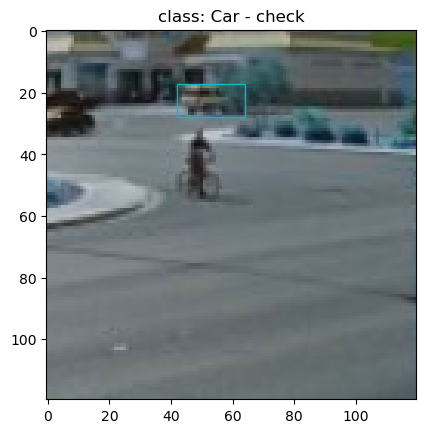

ValueError: Cannot convert '4' to a shape.

In [4]:
import cv2
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle
from collections import deque
import random
import os
from IPython.display import clear_output

# 강화학습 환경 정의 (HumanObjectDetectionEnv)
class HumanObjectDetectionEnv:
    def __init__(self, image, labels, target_index):
        """
        강화학습 환경 초기화.
        image: 입력 이미지
        labels: 유저가 설정한 모든 바운딩박스 (여러 클래스 포함)
        target_class_idx: 유저가 선택한 클래스 인덱스 (해당 클래스의 바운딩박스만 학습에 사용)
        """
        self.image = image
        self.image_height, self.image_width = image.shape[:2]  # 이미지 크기 자동 추출
        self.ground_truth_bboxes = labels  # 실제 bounding box들 (유저가 선택한 여러 개)
        self.target_class_idx = target_index   # 유저가 선택한 클래스에 해당하는 박스만 사용
        self.current_bbox = self.random_bbox()  # 초기 랜덤 bounding box
        self.prev_bbox = self.current_bbox.copy()  # 직전 바운딩박스를 저장
        self.done = False
        self.iou = 0  # 현재 IoU

    def random_bbox(self):
        """
        랜덤 bounding box 생성 (픽셀 좌표로 생성).
        """
        x = np.random.randint(10, self.image_width - 50)  # x 좌표 (10 ~ 이미지 너비 - 50 사이)
        y = np.random.randint(10, self.image_height - 50)  # y 좌표 (10 ~ 이미지 높이 - 50 사이)
        width = np.random.randint(30, self.image_width - x)  # 폭 크기 제한
        height = np.random.randint(30, self.image_height - y)  # 높이 크기 제한
        return [x, y, width, height]

    def calculate_iou(self, box1, box2):
        """
        두 바운딩박스 간의 IoU 계산 (픽셀 좌표 사용).
        """
        x1 = max(box1[0], box2[0])
        y1 = max(box1[1], box2[1])
        x2 = min(box1[0] + box1[2], box2[0] + box2[2])
        y2 = min(box1[1] + box1[3], box2[1] + box2[3])
        
        inter_area = max(0, x2 - x1) * max(0, y2 - y1)
        box1_area = box1[2] * box1[3]
        box2_area = box2[2] * box2[3]
        union_area = box1_area + box2_area - inter_area
        
        return inter_area / union_area  # IoU 반환

    def step(self, action):
        """
        에이전트의 action에 따라 바운딩박스를 조정하고 IoU 계산 (픽셀 좌표 기반).
        action: 0 ~ 7 (위치와 크기 조정)
        """
        # IoU가 0이면 크게 움직이며 탐색
        if self.iou == 0:
            if action == 0:   # 왼쪽 이동
                self.current_bbox[0] = max(0, self.current_bbox[0] - 10)
            elif action == 1: # 오른쪽 이동
                self.current_bbox[0] = min(self.image_width - self.current_bbox[2], self.current_bbox[0] + 10)
            elif action == 2: # 위로 이동
                self.current_bbox[1] = max(0, self.current_bbox[1] - 10)
            elif action == 3: # 아래로 이동
                self.current_bbox[1] = min(self.image_height - self.current_bbox[3], self.current_bbox[1] + 10)
        else:
            # IoU가 0이 아닐 때는 미세한 움직임과 크기 조정으로 최적화
            if action == 0:   # 왼쪽 이동
                self.current_bbox[0] = max(0, self.current_bbox[0] - 5)
            elif action == 1: # 오른쪽 이동
                self.current_bbox[0] = min(self.image_width - self.current_bbox[2], self.current_bbox[0] + 5)
            elif action == 2: # 위로 이동
                self.current_bbox[1] = max(0, self.current_bbox[1] - 5)
            elif action == 3: # 아래로 이동
                self.current_bbox[1] = min(self.image_height - self.current_bbox[3], self.current_bbox[1] + 5)
            elif action == 4: # 폭 넓히기
                self.current_bbox[2] = min(self.image_width - self.current_bbox[0], self.current_bbox[2] + 5)
            elif action == 5: # 폭 줄이기
                self.current_bbox[2] = max(10, self.current_bbox[2] - 5)
            elif action == 6: # 높이 넓히기
                self.current_bbox[3] = min(self.image_height - self.current_bbox[1], self.current_bbox[3] + 5)
            elif action == 7: # 높이 줄이기
                self.current_bbox[3] = max(10, self.current_bbox[3] - 5)

        # 선택한 클래스에 해당하는 ground truth 박스들과 IoU 계산
        max_iou = 0
        for gt_bbox in self.ground_truth_bboxes:
            if gt_bbox['class'] == self.target_class_idx:
                iou = self.calculate_iou(self.current_bbox, gt_bbox['bbox'])
                max_iou = max(max_iou, iou)

        # IoU가 줄어들면 직전 바운딩박스로 복원
        if max_iou < self.iou:
            self.current_bbox = self.prev_bbox.copy()
        else:
            self.prev_bbox = self.current_bbox.copy()  # IoU가 개선되면 현재 바운딩박스를 저장

        # IoU 업데이트
        self.iou = max_iou

        # 목표 도달 여부 판단
        if max_iou > 0.9:  # IoU 0.9 이상이면 목표 도달
            self.done = True
            print(f"목표 도달! IoU: {max_iou}")
        else:
            print(f"현재 IoU: {max_iou}")
        
        # bounding box 시각화 (환경 렌더링)
        self.render()

        return self.current_bbox, max_iou, self.done

    def render(self):
        """
        현재 에이전트의 바운딩박스와 유저가 설정한 바운딩박스를 시각적으로 렌더링.
        """
        fig, ax = plt.subplots(1)
        ax.imshow(self.image)

        # 현재 에이전트의 bounding box 그리기
        current_rect = Rectangle((self.current_bbox[0], 
                                  self.current_bbox[1]), 
                                 self.current_bbox[2], 
                                 self.current_bbox[3], 
                                 linewidth=2, edgecolor='r', facecolor='none')
        ax.add_patch(current_rect)

        # 유저가 설정한 바운딩박스 (선택한 클래스에 해당하는 것만 그리기)
        for gt_bbox in self.ground_truth_bboxes:
            if gt_bbox['class'] == self.target_class_idx:
                gt_rect = Rectangle((gt_bbox['bbox'][0], 
                                     gt_bbox['bbox'][1]), 
                                    gt_bbox['bbox'][2], 
                                    gt_bbox['bbox'][3], 
                                    linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(gt_rect)

        plt.show()
class DDQNAgent:
    def __init__(self, input_shape, action_size):
        self.input_shape = input_shape
        self.action_size = action_size
        self.memory = deque(maxlen=2000)
        self.gamma = 0.95    # 할인율
        self.epsilon = 1.0   # 탐험 비율 (exploration)
        self.epsilon_min = 0.01
        self.epsilon_decay = 0.995
        self.learning_rate = 0.001
        self.model = self._build_model()
        self.target_model = self._build_model()
        self.update_target_model()

    def _build_model(self):
        """
        Conv2D를 사용한 강화학습 모델.
        """
        model = tf.keras.Sequential()

        # Conv2D 레이어 추가 (이미지 특징 추출)
        model.add(tf.keras.layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=self.input_shape))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(tf.keras.layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

        model.add(tf.keras.layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
        model.add(tf.keras.layers.MaxPooling2D(pool_size=(2, 2)))

        # Flatten 레이어를 통해 1차원으로 변환
        model.add(tf.keras.layers.Flatten())

        # Dense 레이어로 fully connected network 연결
        model.add(tf.keras.layers.Dense(512, activation='relu'))

        # 액션 수 만큼의 출력 (linear activation)
        model.add(tf.keras.layers.Dense(self.action_size, activation='linear'))

        model.compile(loss='mse', optimizer=tf.keras.optimizers.Adam(learning_rate=self.learning_rate))
        return model

    def update_target_model(self):
        # Target Model 업데이트
        self.target_model.set_weights(self.model.get_weights())

    def act(self, state):
        # 탐험 또는 최적 행동 선택
        if np.random.rand() <= self.epsilon:
            return random.randrange(self.action_size)
        state = np.expand_dims(state, axis=0)  # 상태의 배치 차원 추가
        act_values = self.model.predict(state)
        return np.argmax(act_values[0])

    def remember(self, state, action, reward, next_state, done):
        # 경험 저장
        self.memory.append((state, action, reward, next_state, done))

    def replay(self, batch_size):
        # 메모리에서 샘플 추출하여 학습
        minibatch = random.sample(self.memory, batch_size)
        for state, action, reward, next_state, done in minibatch:
            target = self.model.predict(state)
            if done:
                target[0][action] = reward
            else:
                t = self.target_model.predict(next_state)[0]
                target[0][action] = reward + self.gamma * np.amax(t)
            self.model.fit(state, target, epochs=1, verbose=0)
        if self.epsilon > self.epsilon_min:
            self.epsilon *= self.epsilon_decay




DATASET_PATH = 'Google_Recaptcha_V2_Images_Dataset/images/'
class_names = sorted(os.listdir(DATASET_PATH))
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'k', 'orange', 'purple', 'pink', 'brown', 'gray']  # 'tab20' 컬러맵에서 12개의 색상을 추출

# 클래스 목록 (사용자가 정의할 수 있음)
classes = class_names
X_train = []
y_train = []  # 이미지별로 라벨을 딕셔너리 형태로 저장할 리스트

# 확대 배율 (라벨링할 때 이미지를 크게 보이도록 설정)
SCALE_FACTOR = 4  # 예: 4배 확대

# 이미지를 확대하여 표시하고, bounding box 좌표를 원본 이미지에 맞게 조정하는 함수
def label_image(image):
    orig_height, orig_width = image.shape[:2]
    large_image = cv2.resize(image, (orig_width * SCALE_FACTOR, orig_height * SCALE_FACTOR))

    # OpenCV로 bounding box 지정 (사용자가 마우스로 선택)
    bboxes = []
    while True:
        bbox = cv2.selectROI(f"bounding box{img_name} (ESC key = end)", large_image, fromCenter=False, showCrosshair=True)
        if bbox[2] == 0 or bbox[3] == 0:  # ESC 키를 눌러 선택을 종료한 경우
            break
        bboxes.append(bbox)
    cv2.destroyAllWindows()

    labels = []
    for bbox in bboxes:
        for i, cls in enumerate(classes):
            print(f"{i}: {cls}")
        plt.imshow(large_image)
        rect = plt.Rectangle((bbox[0], bbox[1]), bbox[2], bbox[3], edgecolor='r', facecolor='none')
        plt.gca().add_patch(rect)
        plt.title(f"check your select{img_name}")

        plt.show()
        print(f"클래스 이름: {class_names}")
        print("클래스를 선택하세요: ")
        class_idx = input("클래스 인덱스를 입력하세요 (중단하려면 'exit' 입력): ")
        clear_output() 
        if class_idx == 'exit':
            print("라벨링 작업을 중단합니다.")
            return None  # 작업 중단

        class_idx = int(class_idx)
        
        # Bounding box 좌표를 원본 크기로 변환
        bbox_resized = (
            bbox[0] // SCALE_FACTOR,  # x 좌표
            bbox[1] // SCALE_FACTOR,  # y 좌표
            bbox[2] // SCALE_FACTOR,  # 폭 (width)
            bbox[3] // SCALE_FACTOR   # 높이 (height)
        )
        
        # Bounding box 좌표를 원본 이미지 크기로 정규화
        bbox_normalized = {
            "class": class_idx,
            "bbox": [
                bbox_resized[0],  # x 좌표 (정규화)
                bbox_resized[1],  # y 좌표 (정규화)
                bbox_resized[2],  # 폭 (정규화)
                bbox_resized[3]  # 높이 (정규화)
            ]
        }
        labels.append(bbox_normalized)
        plt.imshow(image)
        color = colors[class_idx % len(colors)]
        rect = plt.Rectangle((bbox_normalized['bbox'][0], bbox_normalized['bbox'][1]), 
                             bbox_normalized['bbox'][2], bbox_normalized['bbox'][3], 
                             edgecolor=color, facecolor='none')
        plt.gca().add_patch(rect)
        plt.title(f"class: {classes[class_idx]} - check")
        plt.show()
    return labels

# 이미지 폴더 내의 모든 이미지에 대해 라벨링 작업 수행
for label, class_name in enumerate(class_names):
    class_dir = os.path.join(DATASET_PATH, class_name)
    if not os.path.isdir(class_dir):
        continue
    for img_name in os.listdir(class_dir):
        img_path = os.path.join(class_dir, img_name)
        # 이미지 읽기
        clear_output() 
        img = cv2.imread(img_path)
        print(class_names)
        if img is None:
            continue  # 이미지 로드 실패 시 건너뛰기
        labels = label_image(img)  # 여러 bounding box 라벨링
        if labels == None:
            check_user = input('더 할꺼임? no치면 작업 완전 종료 other 치면 다른 디렉토리로 이동')
            if check_user == 'no':
                check_next ='no'
                break
            elif check_user == 'other':
                check_next = 'other'
                break
            else:
                continue
        target_class=int(input('학습할 클래스의 인덱스를 입력:'))
        env = HumanObjectDetectionEnv(img, labels, target_class)

        # 강화학습 에이전트 생성 및 학습 과정
        state_size = 4  # bounding box의 (x, y, width, height)
        action_size = 8  # 8가지 행동 (위, 아래, 왼쪽, 오른쪽, 폭 확대/축소, 높이 확대/축소)
        agent = DDQNAgent(state_size, action_size)

        episodes = 10
        for e in range(episodes):
            state = env.random_bbox()
            state = np.reshape(state, [1, state_size])
            
            for time in range(200):
                # 에이전트가 행동 선택
                action = agent.act(state)
                
                # 환경에 action 적용하고 다음 상태, 보상, 종료 여부 받기
                next_state, reward, done = env.step(action)
                next_state = np.reshape(next_state, [1, state_size])
                
                # 에이전트에게 경험 저장
                agent.remember(state, action, reward, next_state, done)
                
                # 상태 업데이트
                state = next_state
                clear_output(wait=True)
                if done:
                    agent.update_target_model()
                    print(f"Episode: {e}/{episodes}, Score: {reward}")
                    break
                
            if len(agent.memory) > 32:
                agent.replay(32)
    if check_next == 'no':
        break
    elif check_next =='other':
        continue

        

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Input, Flatten, Conv2D, MaxPooling2D, Reshape
from tensorflow.keras.optimizers import Adam

def build_policy_network(state_size, action_size):
    model = Sequential([
        Dense(256, activation='relu', input_shape=(state_size,)),
        Dense(128, activation='relu'),
        Dense(action_size, activation='softmax')  # 각 행동에 대한 확률 출력
    ])
    model.compile(optimizer=Adam(learning_rate=0.001),
                  loss='categorical_crossentropy')
    return model

# 예시 사용
state_size = images.shape[1] * images.shape[2] * images.shape[3]  # 평탄화된 이미지 벡터 크기
action_size = num_classes  # 예: 클래스 수 만큼의 행동

policy_model = build_policy_network(state_size, action_size)
policy_model.summary()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


KeyboardInterrupt: 

In [204]:
import tensorflow as tf

def train_policy_gradient(env, model, episodes=1000, gamma=0.99):
    optimizer = tf.keras.optimizers.Adam(learning_rate=0.001)
    for episode in range(episodes):
        state = env.reset()
        env.render()
        with tf.GradientTape() as tape:
            state_input = tf.expand_dims(state, 0)  # 배치 차원 추가
            action_probs = model(state_input, training=True)
            action = np.random.choice(action_size, p=action_probs.numpy()[0])
            one_hot_action = tf.one_hot(action, action_size)
            # 에이전트의 행동을 환경에 적용
            next_state, reward, done, _ = env.step(action)
            # 손실 정의: -log(probability of action) * reward
            loss = -tf.math.log(action_probs[0][action] + 1e-10) * reward
        # 그래디언트 계산 및 업데이트
        grads = tape.gradient(loss, model.trainable_variables)
        optimizer.apply_gradients(zip(grads, model.trainable_variables))
        if (episode + 1) % 100 == 0:
            print(f"Episode {episode+1}/{episodes} - Reward: {reward}")


In [ ]:
# 환경 초기화
env = ObjectDetectionEnv(images, labels, class_names, IMG_HEIGHT, IMG_WIDTH)

# 강화학습 학습 실행
train_policy_gradient(env, policy_model, episodes=1000)
